<a href="https://colab.research.google.com/github/estefaniaperezpadilla/Estadistica2026B/blob/main/test_energy_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# repositorios: www.github.com
# bases de datos: www.kaggle.com

link = "https://raw.githubusercontent.com/estefaniaperezpadilla/Estadistica2026B/refs/heads/main/Test_energy/test_energy_data.csv"

import pandas as pd

df = pd.read_csv(link)

df

,edificio,pies_cuadrados,nuemero_de_ocupantes,aparatos,temperatura,dia,energia
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59
...,...,...,...,...,...,...,...
95,Commercial,1161,81,11,15.45,Weekend,3010.81
96,Residential,37943,50,23,21.73,Weekend,4248.49
97,Commercial,1558,27,29,16.86,Weekend,2843.60
98,Industrial,2145,56,12,11.77,Weekend,3348.39


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   edificio              100 non-null    object 
 1   pies_cuadrados        100 non-null    int64  
 2   nuemero_de_ocupantes  100 non-null    int64  
 3   aparatos              100 non-null    int64  
 4   temperatura           100 non-null    float64
 5   dia                   100 non-null    object 
 6   energia               100 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 5.6+ KB


In [3]:
df.dropna(inplace = True)

In [4]:
x = df["pies_cuadrados"]
y = df["energia"]

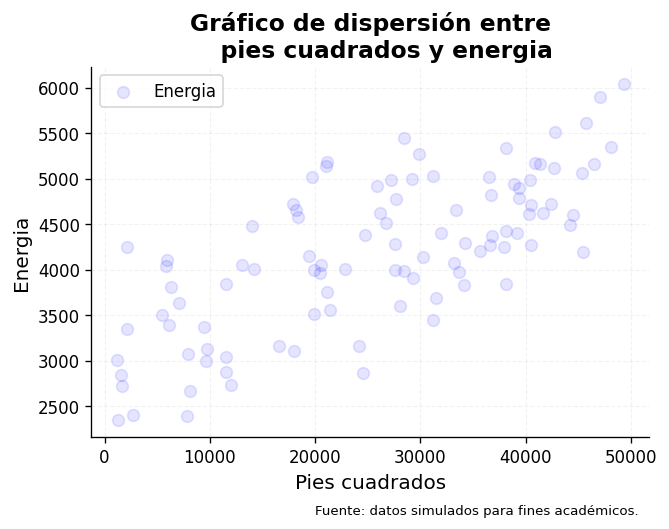

In [8]:
# @title
# 2. Realice un diagrama de dispersión para estos datos.
import matplotlib.pyplot as plt

# --- Configuración general del gráfico ---
plt.figure(
    figsize=(6, 4),   # tamaño de la figura (ancho, alto) en pulgadas
    dpi=120           # resolución del gráfico
)

# --- Gráfico de dispersión ---
plt.scatter(
    x, y,
    marker="o",       # forma
    color='blue',     # color de los puntos
    edgecolor='blue',    # borde de los puntos
    alpha=0.1,            # transparencia
    s=50,                 # tamaño de los puntos
    label='Energia' # etiqueta para la leyenda
)

# --- Gráfico de línea ---
# plt.plot(
#     x, y,
#     color='orange',   # color de la línea
#     linewidth=2.2,        # grosor de la línea
#     linestyle='-',        # estilo de línea
#     marker='o',           # marcador en cada punto
#     markersize=5,         # tamaño del marcador
#     markerfacecolor='white',
#     markeredgecolor='black',
#     label='Datos observados'
# )

# --- Título ---
plt.title(
    '''Gráfico de dispersión entre
    pies cuadrados y energia''',
    fontsize=14,
    fontweight='bold'
)

# --- Etiquetas de los ejes ---
plt.xlabel(
    'Pies cuadrados',
    fontsize=12
)

plt.ylabel(
    'Energia',
    fontsize=12
)

# --- Fuente de los ticks ---
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# --- Márgenes ---
plt.margins(x=0.05, y=0.05)  # espacio extra alrededor de los datos
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior

# Para eliminar márgenes completamente, usar:
# plt.margins(0)

# --- Cuadrícula (opcional, pero didáctica) ---
plt.grid(
    visible=True,
    linestyle='--',
    linewidth=0.7,
    alpha=0.1,
    color="gray"
)

# --- Leyenda ---
plt.legend(
    fontsize=10,
    loc='best',
    frameon=True
)

# --- Nota al pie ---
plt.text(
    0.4, -0.2,
    'Fuente: datos simulados para fines académicos.',
    fontsize=8,
    ha='left',
    va='center',
    transform=plt.gca().transAxes
)

# --- Guardar gráfico ---
plt.savefig(
    "grafico de dispersión",
    bbox_inches='tight'
    )

plt.show()


In [6]:
#4. Calcule el coeficiente de correlación e interprete el resultado.
from scipy.stats import pearsonr

# Test de Pearson
# H0: rho = 0     (No hay correlación)
# H1: rho ≠ 0     (Sí hay correlación)
# alpha = 0.05

r, valor_p = pearsonr(x, y)

print(f"Coeficiente de correlación: {r: 0.4f}")
print(f'Valor p: {valor_p: 0.4f}')

Coeficiente de correlación:  0.7240
Valor p:  0.0000


In [7]:
# 6. Obtenga la recta de regresión ajustada y grafíquelo sobre el
# gráfico de dispersión

import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()
y_calculada = modelo.predict(x_constante)

modelo.params

,0
const,3049.682473
pies_cuadrados,0.043965


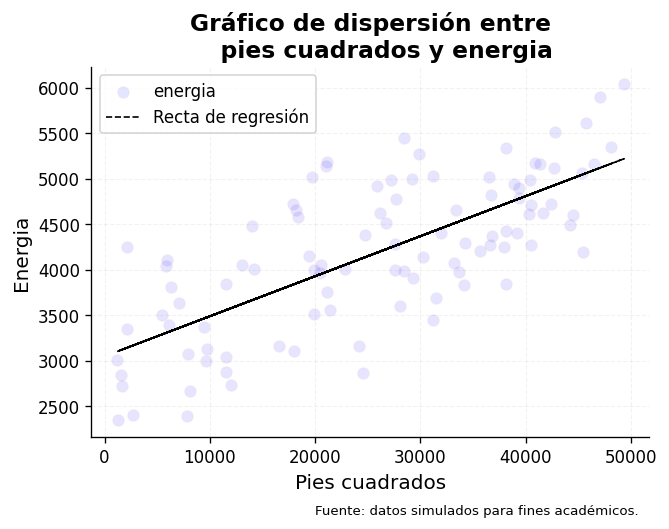

In [10]:
# @title
# 2. Realice un diagrama de dispersión para estos datos.
import matplotlib.pyplot as plt

# --- Configuración general del gráfico ---
plt.figure(
    figsize=(6, 4),   # tamaño de la figura (ancho, alto) en pulgadas
    dpi=120           # resolución del gráfico
)

# --- Gráfico de dispersión ---
plt.scatter(
    x, y,
    marker="o",       # forma
    color='blue',     # color de los puntos
    edgecolor='pink',    # borde de los puntos
    alpha=0.1,            # transparencia
    s=50,                 # tamaño de los puntos
    label='energia' # etiqueta para la leyenda
)

# --- Gráfico de línea ---
plt.plot(
    x, y_calculada,
    color='black',   # color de la línea
    linewidth=1,        # grosor de la línea
    linestyle='--',        # estilo de línea
    marker='o',           # marcador en cada punto
    markersize=0,         # tamaño del marcador
    markerfacecolor='white',
    markeredgecolor='black',
    label='Recta de regresión'
)

# --- Título ---
plt.title(
    '''Gráfico de dispersión entre
    pies cuadrados y energia''',
    fontsize=14,
    fontweight='bold'
)

# --- Etiquetas de los ejes ---
plt.xlabel(
    'Pies cuadrados',
    fontsize=12
)

plt.ylabel(
    'Energia',
    fontsize=12
)

# --- Fuente de los ticks ---
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# --- Márgenes ---
plt.margins(x=0.05, y=0.05)  # espacio extra alrededor de los datos
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior

# Para eliminar márgenes completamente, usar:
# plt.margins(0)

# --- Cuadrícula (opcional, pero didáctica) ---
plt.grid(
    visible=True,
    linestyle='--',
    linewidth=0.7,
    alpha=0.1,
    color="gray"
)

# --- Leyenda ---
plt.legend(
    fontsize=10,
    loc='best',
    frameon=True
)

# --- Nota al pie ---
plt.text(
    0.4, -0.2,
    'Fuente: datos simulados para fines académicos.',
    fontsize=8,
    ha='left',
    va='center',
    transform=plt.gca().transAxes
)

# --- Guardar gráfico ---
plt.savefig(
    "grafico de dispersión",
    bbox_inches='tight'
    )

plt.show()


In [12]:
# 5. Calcule el coeficiente de determinación e interprete el resultado.
from sklearn.metrics import r2_score  # recomendada
r2 = r2_score(y, y_calculada)
print(f'Coeficiente de determinación: {r2: 0.2%}\n')

Coeficiente de determinación:  52.42%



In [13]:
# 7. Obtenga un intervalo de confianza del 95% para la pendiente de la recta de
# regresión ajustada ( b1 )

# intervalo de confianza = 1 - alpha

modelo.conf_int(alpha = 0.05)

,0,1
const,2804.038639,3295.326306
pies_cuadrados,0.035569,0.052361


In [14]:
# 8. Calcule los residuales y trace un nuevo gráfico de dispersión. Comente,
# ¿Parece que se verifican los supuestos?

# Los residuales son la diferencia entre el valor real y el valor que da el
# modelo

# residuales = y - y_calculada
residuales = modelo.resid

residuales

,0
0,-1264.022124
1,21.433901
2,25.966359
3,-255.421118
4,156.516679
...,...
95,-89.915713
96,-469.352384
97,-274.579775
98,204.402833


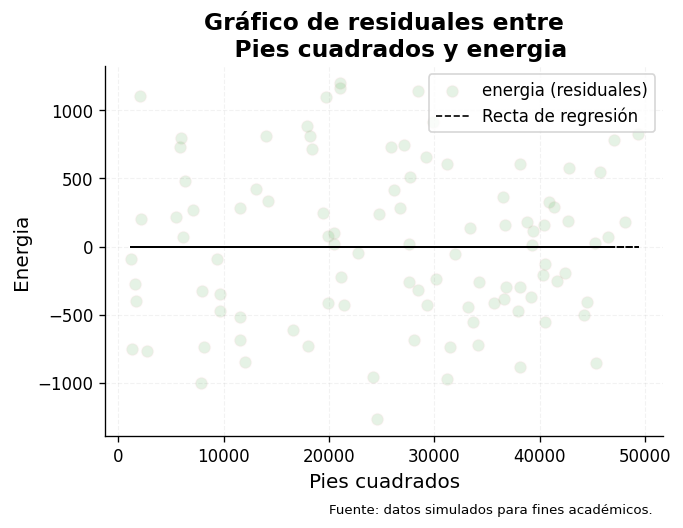

In [16]:
# @title
# 2. Realice un diagrama de dispersión para estos datos.
import matplotlib.pyplot as plt

# --- Configuración general del gráfico ---
plt.figure(
    figsize=(6, 4),   # tamaño de la figura (ancho, alto) en pulgadas
    dpi=120           # resolución del gráfico
)

# --- Gráfico de dispersión ---
plt.scatter(
    x, residuales,
    marker="o",       # forma
    color='green',     # color de los puntos
    edgecolor='pink',    # borde de los puntos
    alpha=0.1,            # transparencia
    s=50,                 # tamaño de los puntos
    label='energia (residuales)' # etiqueta para la leyenda
)

# --- Gráfico de línea ---
plt.plot(
    x, 0 * y_calculada,
    color='black',   # color de la línea
    linewidth=1,        # grosor de la línea
    linestyle='--',        # estilo de línea
    marker='o',           # marcador en cada punto
    markersize=0,         # tamaño del marcador
    markerfacecolor='white',
    markeredgecolor='black',
    label='Recta de regresión'
)

# --- Título ---
plt.title(
    '''Gráfico de residuales entre
    Pies cuadrados y energia''',
    fontsize=14,
    fontweight='bold'
)

# --- Etiquetas de los ejes ---
plt.xlabel(
    'Pies cuadrados',
    fontsize=12
)

plt.ylabel(
    'Energia',
    fontsize=12
)

# --- Fuente de los ticks ---
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# --- Márgenes ---
plt.margins(x=0.05, y=0.05)  # espacio extra alrededor de los datos
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior

# Para eliminar márgenes completamente, usar:
# plt.margins(0)

# --- Cuadrícula (opcional, pero didáctica) ---
plt.grid(
    visible=True,
    linestyle='--',
    linewidth=0.7,
    alpha=0.1,
    color="gray"
)

# --- Leyenda ---
plt.legend(
    fontsize=10,
    loc='best',
    frameon=True
)

# --- Nota al pie ---
plt.text(
    0.4, -0.2,
    'Fuente: datos simulados para fines académicos.',
    fontsize=8,
    ha='left',
    va='center',
    transform=plt.gca().transAxes
)

# --- Guardar gráfico ---
plt.savefig(
    "grafico de dispersión",
    bbox_inches='tight'
    )

plt.show()
